### Setup

In [35]:
# matplotlib for plotting the data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker

from homeassistant.components.recorder.models import Base, Events, States, RecorderRuns
import homeassistant.util.dt as dt

In [37]:
# Your database url as specified in configuration.yaml
# If using default settings, it's sqlite:///<path to config dir>/home-assistant_v2.db
DB_URL = 'sqlite:////home/fab/.homeassistant/home-assistant_v2.db'
SENSOR = 'sensor.aare'

In [38]:
engine = create_engine(DB_URL)
Base.metadata.create_all(engine)
session_factory = sessionmaker(bind=engine)
Session = scoped_session(session_factory)

### Query

In [39]:
data = list(engine.execute("SELECT state, last_changed FROM states where entity_id = '{}'".format(SENSOR)))

### Prepare data for graph

In [40]:
values = []
timestamps = []
for x in data:
    timestamps.append(dates.date2num(dt.parse_datetime(x[1])))
    values.append(float(x[0]))

### Plot the graph

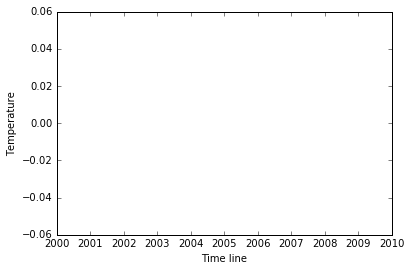

In [41]:
plt.plot_date(x=timestamps, y=values, fmt="r-")
plt.ylabel('Temperature')
plt.xlabel('Time line')